In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL2dlc3Rpb25fYWN0aWZz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_96378/1683896823.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
import numpy as np
def pricing_bond(t,c,T,r,lambda_,R,N,dt=1):
    """
    Fonction qui calcule la valeur d'une obligation.
    t : date actuelle
    c : coupon
    T : date de maturité
    r : taux sans risque
    lambda_ : intensité de défaut
    R : taux de recouvrement
    N : nominal
    """

    ### Valorisation du coupon
    Ct = N * c * np.sum([np.exp(-(r+lambda_) * (Ti - t)) * (Ti>=t) for Ti in range(dt, T+dt,dt)])

    ### Valorisation du nominal
    #Proba de survie
    PS = np.exp( - lambda_ * (T - t))
    Nt = N * np.exp( -r * (T - t)) * PS * (T>=t)

    ### Valorisation du recouvrement
    if (r+lambda_)==0 :
        R_ = T-t
    else :
        R_ = N * lambda_ * R * ( 1 - np.exp( - (r+lambda_) * (T-t)))/(r+lambda_)
    Rt = R_ * (T >= t)

    ### Valorisation de l'obligation
    Bond = Ct + Nt + Rt
    return Bond

In [3]:
t=0
lambda_ = 0
r = 2/100
T = 10
c = 2/100
R = 40/100
N=1

B_t = pricing_bond(t=t,c=c,T=T,r=r,lambda_=lambda_,R=R,N=N)
print(f"Prix de l'obligation vu à t={t} : {B_t}")

Prix de l'obligation vu à t=0 : 0.9981933497987289


In [4]:
t=0
lambda_ = 1/100
r = 2/100
T = 10
R = 40/100
N=1

# Méthode de dichotomie
from scipy.optimize import bisect

def trouver_coupon(t, T, r, lambda_, R, N, dt=1, tol=1e-6):
    """
    Trouve le coupon c tel que la valeur de l'obligation soit égale à N.
    """
    def equation(c):
        return pricing_bond(t, c, T, r, lambda_, R, N, dt) - N
    
    c_opt = bisect(equation, 0, 1, xtol=tol)  # Recherche de c dans l'intervalle [0,1]
    return c_opt

c_opt = trouver_coupon(t=t, T=T, r=r, lambda_=lambda_, R=R, N=N)
c_opt

print(f"Coupon pour avoir une obligation au pair vu à t={t} : {c_opt:.2%}")
B_t = pricing_bond(t=t,c=c_opt,T=T,r=r,lambda_=lambda_,R=R,N=N)
print(f"Prix de l'obligation vu à t={t} : {B_t}")

Coupon pour avoir une obligation au pair vu à t=0 : 2.64%
Prix de l'obligation vu à t=0 : 1.000007783902349


In [5]:
t=0
lambda_ = 10
r = 2/100
T = 10
c = 2/100
R = 40/100
N=1


B_t = pricing_bond(t=t,c=c,T=T,r=r,lambda_=lambda_,R=R,N=N)
print(f"Prix de l'obligation vu à t={t} : {B_t:.4f}")
print(f"Taux de recouvrement : {R:.4f}")

Prix de l'obligation vu à t=0 : 0.3992
Taux de recouvrement : 0.4000


In [6]:
def myFloor(x):
    if x==0:
        return 0
    if x==np.floor(x):
        return x-1
    return np.floor(x)

def clean_price(t,c,T,r,lambda_,R,N,dt=1):
    """
    Fonction qui calcule le prix d'une obligation propre.
    """
    B_t = pricing_bond(t,c,T,r,lambda_,R,N,dt)
    cc = c * (t - myFloor(t))

    return B_t - cc

Text(0, 0.5, "Prix de l'obligation")

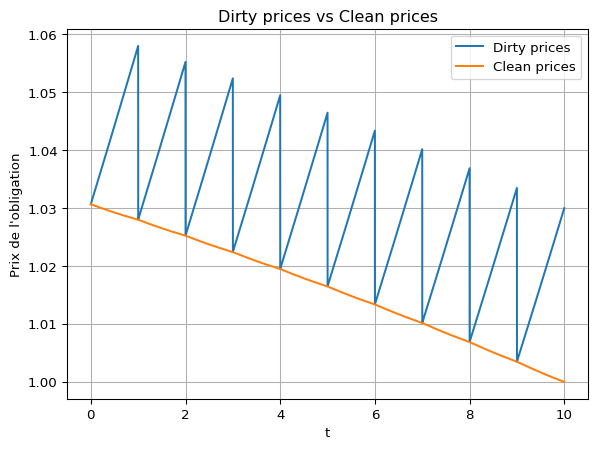

In [7]:
t=0
lambda_ = 1/100
r = 2/100
T = 10
c = 3/100
R = 40/100
N=1


dirty_prices = []
clean_prices = []
grid_values_c = np.arange(0,T+0.001,0.001)
for t in grid_values_c:
    dirty_prices.append(pricing_bond(t,c,T,r,lambda_,R,N))
    clean_prices.append(clean_price(t,c,T,r,lambda_,R,N))


import matplotlib.pyplot as plt
plt.plot(grid_values_c,dirty_prices, label="Dirty prices")
plt.plot(grid_values_c,clean_prices, label="Clean prices")
plt.title("Dirty prices vs Clean prices")
plt.xlabel("t")
plt.grid()
plt.legend()
plt.ylabel("Prix de l'obligation")

Text(0, 0.5, "Prix de l'obligation")

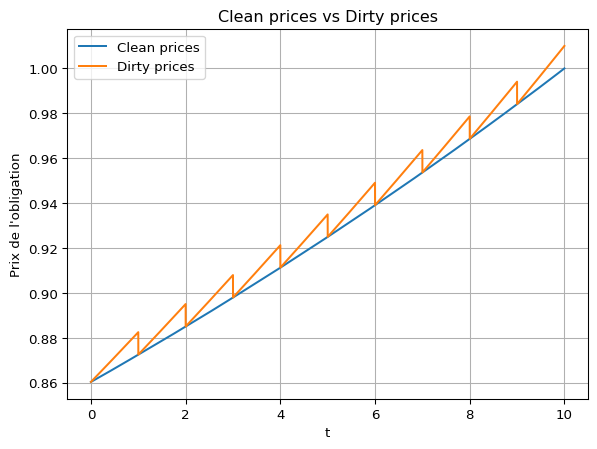

In [8]:
lambda_ = 1/100
r = 2/100
T = 10
c1 = 1/100
R = 40/100
N=1

clean_prices1 = []
dirty_prices1 = []
for t in grid_values_c:
    B_t_dirty = pricing_bond(t=t,c=c1,T=T,r=r,lambda_=lambda_,R=R,N=N)
    B_t_clean = clean_price(t=t,c=c1,T=T,r=r,lambda_=lambda_,R=R,N=N)
    clean_prices1.append(B_t_clean)
    dirty_prices1.append(B_t_dirty)

plt.plot(grid_values_c,clean_prices1, label="Clean prices")
plt.plot(grid_values_c,dirty_prices1, label="Dirty prices")
plt.title("Clean prices vs Dirty prices")
plt.legend()
plt.grid()
plt.xlabel("t")
plt.ylabel("Prix de l'obligation")

Text(0, 0.5, "Prix de l'obligation")

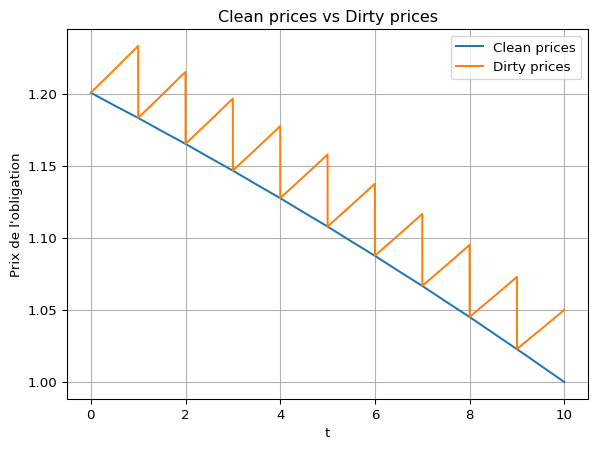

In [9]:
lambda_ = 1/100
r = 2/100
T = 10
c2 = 5/100
R = 40/100
N=1

clean_prices2 = []
dirty_prices2 = []
for t in grid_values_c:
    B_t_dirty = pricing_bond(t=t,c=c2,T=T,r=r,lambda_=lambda_,R=R,N=N)
    B_t_clean = clean_price(t=t,c=c2,T=T,r=r,lambda_=lambda_,R=R,N=N)
    clean_prices2.append(B_t_clean)
    dirty_prices2.append(B_t_dirty)

plt.plot(grid_values_c,clean_prices2, label="Clean prices")
plt.plot(grid_values_c,dirty_prices2, label="Dirty prices")
plt.title("Clean prices vs Dirty prices")
plt.legend()
plt.grid()
plt.xlabel("t")
plt.ylabel("Prix de l'obligation")

Text(0, 0.5, "Prix de l'obligation")

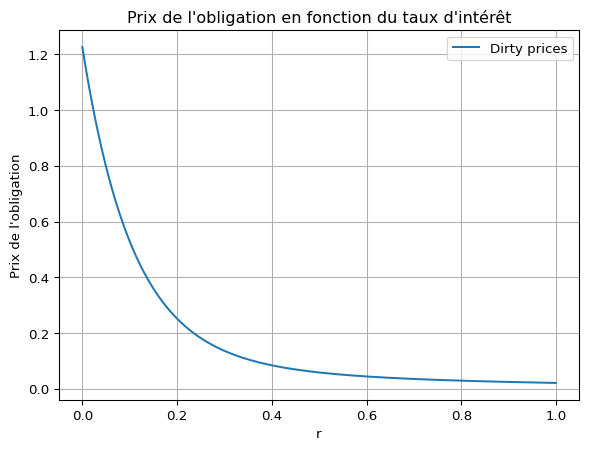

In [10]:
t=0
lambda_ = 1/100
T = 10
c =3/100
R = 40/100
N=1

dirty_prices = []
grid_values_r = np.arange(0,1,0.001) 
for r in grid_values_r:
    B_t_dirty = pricing_bond(t=t,c=c,T=T,r=r,lambda_=lambda_,R=R,N=N)
    dirty_prices.append(B_t_dirty)

plt.plot(grid_values_r,dirty_prices, label="Dirty prices")
plt.title("Prix de l'obligation en fonction du taux d'intérêt")
plt.legend()
plt.grid()
plt.xlabel("r")
plt.ylabel("Prix de l'obligation")

In [11]:
def sensivity_to_rate(t,c,T,r,lambda_,R,N,dt=1,dr= 0.01/100):
    """
    Fonction qui calcule la sensibilité d'une obligation à un taux d'intérêt.
    """
    B_t = pricing_bond(t,c,T,r,lambda_,R,N,dt)
    B_t_plus = pricing_bond(t,c,T,r+dr,lambda_,R,N,dt)
    sensivity = -((B_t_plus - B_t)/dr) * (1/B_t)
    return sensivity

In [12]:
t=0
lambda_ = 1/100
T = 10
c =3/100
R = 40/100
r = 2/100
N=1

sensivity_to_rate(t,c,T,r,lambda_,R,N)

np.float64(8.643982489102903)

Text(0, 0.5, 'Sensibilité')

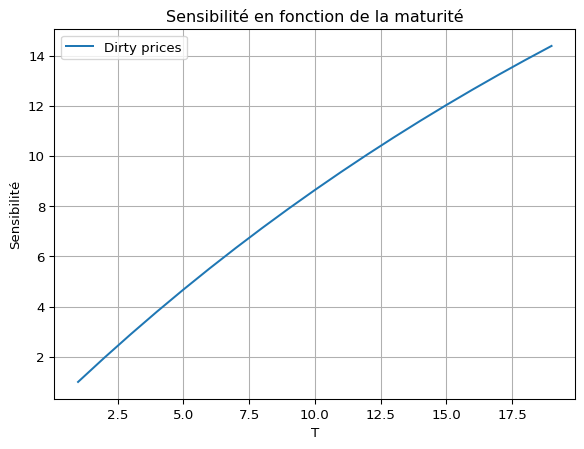

In [13]:
t=0
lambda_ = 1/100
r = 2/100
c =3/100
R = 40/100
N=1

dirty_prices = []
grid_values_T = np.arange(1,20,1)
for T in grid_values_T:
    B_t_dirty = sensivity_to_rate(t,c,T,r,lambda_,R,N)
    dirty_prices.append(B_t_dirty)

plt.plot(grid_values_T,dirty_prices, label="Dirty prices")
plt.title("Sensibilité en fonction de la maturité")
plt.legend()
plt.grid()
plt.xlabel("T")
plt.ylabel("Sensibilité")

Text(0, 0.5, 'Sensibilité')

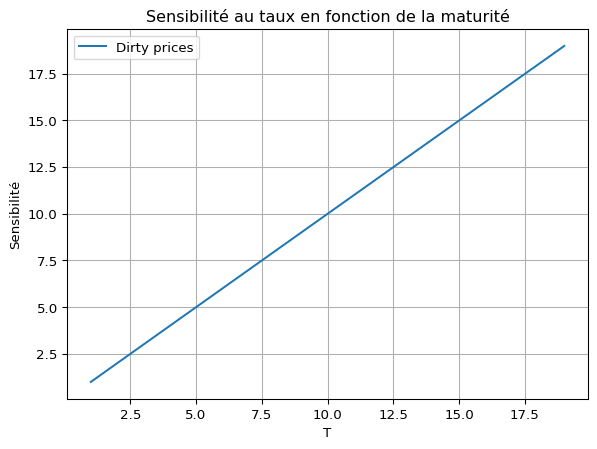

In [14]:
t=0
c = lambda_ = 10e-6
R = 40/100
N=1


dirty_prices = []
for T in grid_values_T:
    B_t_dirty = sensivity_to_rate(t,c,T,r,lambda_,R,N)
    dirty_prices.append(B_t_dirty)

plt.plot(grid_values_T,dirty_prices, label="Dirty prices")
plt.title("Sensibilité au taux en fonction de la maturité")
plt.legend()
plt.grid()
plt.xlabel("T")
plt.ylabel("Sensibilité")

In [15]:
# Objectif : écrire une fonction qui calcule la VaR avec l'approche par duration
from scipy.stats import norm

def sensitive_VaR(mu,sigma,t,c,T,r,lambda_,R,N,h,dt=1,alpha=0.99) :
    """
    Calcul de la VaR gaussienne
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """
    Duration = sensivity_to_rate(t,c,T,r,lambda_,R,N,dt)

    return -(mu + Duration * sigma * np.sqrt(h) * norm.ppf(1 - alpha))

#--------------------------------------
# Paramètres du modèle de taux
#---------------------------------------

mu = 0
h = 1/12
sigma = 0.01

#--------------------------------------
# Paramètres de la valorisation du bond
#---------------------------------------

t=0
lambda_ = 1/100
r = 2/100
c =3/100
R = 40/100
N=1
T=10

VaR = sensitive_VaR(mu,sigma,t,c,T,r,lambda_,R,N,h=h,dt=1,alpha=0.99)
print(f"VaR estimé par l'approche par la sensibilité : {VaR:.4%}")

VaR estimé par l'approche par la sensibilité : 5.8049%


In [16]:
import pandas as pd
estr_df = pd.read_excel("estr.xlsx", skiprows=6)
#date as date
estr_df["Date"] = pd.to_datetime(estr_df["Date"], format="%Y-%m-%d")
estr_df = estr_df.set_index("Date")
estr_df = estr_df.sort_index()

estr_df.head()

,PX_LAST,CHG_PCT_1D
Date,,
2020-03-12,-0.540,0.5525
2020-03-13,-0.541,-0.1852
2020-03-16,-0.536,0.9242
2020-03-17,-0.531,0.9328
2020-03-18,-0.529,0.3766


In [17]:
vol_est = np.std(estr_df["PX_LAST"].pct_change())
print(f"Volatilité estimée sur 5 ans: {vol_est:.4f}")

# volatilité sur 1 an
vol_est= np.std(estr_df.loc["2024-03-10":"2025-03-10", "PX_LAST"].pct_change())
print(f"Volatilité estimée sur 1 an : {vol_est:.4f}")

Volatilité estimée sur 5 ans: 0.2545
Volatilité estimée sur 1 an : 0.0104


In [18]:
def repricing_VaR(mu,sigma,t,c,T,r,lambda_,R,N,h,dt=1,alpha=0.99) :
    """
    Calcul de la VaR gaussienne
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """
    delta_r = mu + sigma * np.sqrt(h) * norm.ppf(alpha)
    P_t = pricing_bond(t,c,T,r,lambda_,R,N,dt)
    P_t_shocked = pricing_bond(t,c,T,r+delta_r,lambda_,R,N,dt)

    VAR = -( (P_t_shocked - P_t)/P_t)

    return VAR, delta_r


#--------------------------------------
# Paramètres du modèle de taux
#---------------------------------------
mu = 0
h = 1/12
sigma = 0.01

#--------------------------------------
# Paramètres de la valorisation du bond
#---------------------------------------
t=0
lambda_ = 1/100
r = 2/100
c =3/100
R = 40/100
N=1
T=10

VaR, delta_r = repricing_VaR(mu,sigma,t,c,T,r,lambda_,R,N,h=h,dt=1,alpha=0.99)

print(f"VaR estimé par l'approche par le réajustement : {VaR:.4%}")
print(f"Choc de taux : {delta_r:.2%}")

VaR estimé par l'approche par le réajustement : 5.6272%
Choc de taux : 0.67%


Spread de crédit : 10.31%
Recouvrement : 40.00%
Intensité de défaut : 17.18%


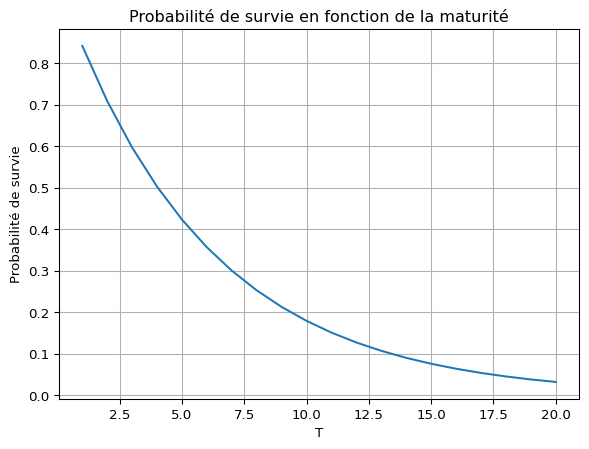

In [19]:
s = 1031/10000 
R = 0.4
lambda_ = s / (1 - R)
t=0

print(f"Spread de crédit : {s:.2%}")
print(f"Recouvrement : {R:.2%}")
print(f"Intensité de défaut : {lambda_:.2%}")
PS = [np.exp( - lambda_ * (T - t)) for T in range(1, 21)]

plt.plot(range(1,21),PS)
plt.title("Probabilité de survie en fonction de la maturité")
plt.xlabel("T")
plt.ylabel("Probabilité de survie")
plt.grid()

Spread de crédit : 0.32%
Recouvrement : 40.00%
Intensité de défaut : 0.54%


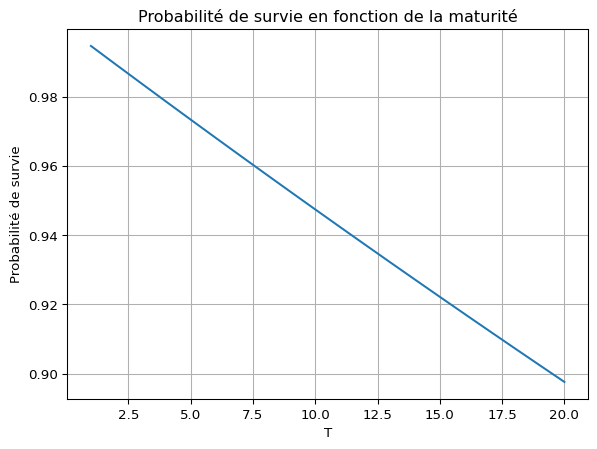

In [20]:
# Cas de la France
s = 32.4/10000 
R = 0.4
lambda_ = s / (1 - R)
t=0

print(f"Spread de crédit : {s:.2%}")
print(f"Recouvrement : {R:.2%}")
print(f"Intensité de défaut : {lambda_:.2%}")
PS = [np.exp( - lambda_ * (T - t)) for T in range(1, 21)]

plt.plot(range(1,21),PS)
plt.title("Probabilité de survie en fonction de la maturité")
plt.xlabel("T")
plt.ylabel("Probabilité de survie")
plt.grid()

In [21]:
def sensivity_to_credit(t,c,T,r,lambda_,R,N,dt=1,dlambda_= 0.01/100):
    """
    Fonction qui calcule la sensibilité d'une obligation à un taux d'intérêt.
    """
    B_t = pricing_bond(t,c,T,r,lambda_,R,N,dt)
    B_t_plus = pricing_bond(t,c,T,r,lambda_ + dlambda_,R,N,dt)
    
    sensivity = -((B_t_plus - B_t)/dlambda_) * (1/B_t) * (1/ (1-R))

    return sensivity

In [22]:
t=0
lambda_ = 1/100
T = 10
c =3/100
R = 40/100
r = 2/100
N=1

sensivity_to_credit(t,c,T,r,lambda_,R,N,dlambda_=0.01/100)

np.float64(8.821190868023761)

Text(0, 0.5, 'Sensibilité')

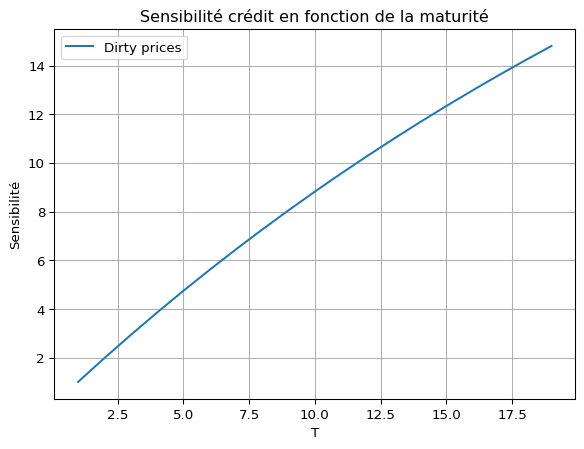

In [23]:
t=0
lambda_ = 1/100
r = 2/100
c =3/100
R = 40/100
N=1

dirty_prices = []
grid_values_T = np.arange(1,20,1)
for T in grid_values_T:
    B_t_dirty = sensivity_to_credit(t,c,T,r,lambda_,R,N)
    dirty_prices.append(B_t_dirty)

plt.plot(grid_values_T,dirty_prices, label="Dirty prices")
plt.title("Sensibilité crédit en fonction de la maturité")
plt.legend()
plt.grid()
plt.xlabel("T")
plt.ylabel("Sensibilité")

In [24]:
import numpy as np

def MC_VaR(c,T,r,lambda_,R,N,h,sigma_r, sigma_s, rho, alpha=0.99, N_MC=1000,dt=1):
    # print("Parameters")
    # print(f"coupon : {c:.2%}")
    # print(f"maturity : {T} years")
    # print(f"risk free rate : {r:.2%}")
    # print(f"credit spread : {lambda_:.2%}")
    # print(f"recovery rate : {R:.2%}")
    # print(f"nominal : {N}")

    prices = []
    
    P_0 = pricing_bond(t=0,c=c,T=T,r=r,lambda_=lambda_,R=R,N=N,dt=dt)
    # print(f"P0 : {P_0}")

    s_0 = lambda_ * (1 - R)
    r_0 = r

    for t in range(N_MC):
        # Generate correlated Brownian motions
        W1 = np.random.normal()
        W2 = rho * W1 + np.sqrt(1 - rho) * np.random.normal()

        # Euler discretization 
        r_h = r_0 + sigma_r * np.sqrt(h) * W1
        s_h = s_0 * ( 1 + sigma_s * np.sqrt(h) * W2)
        lambda_h = s_h / (1 - R)
        # print("="*30)
        # print("Parameters")
        # print(f"coupon : {c:.2%}")
        # print(f"maturity : {T} years")
        # print(f"risk free rate : {r_h:.2%}")
        # print(f"credit spread : {lambda_h:.2%}")
        # print(f"recovery rate : {R:.2%}")
        # print(f"nominal : {N}")

        P_h = pricing_bond(t=h,c=c,T=T,r=r_h,lambda_ = lambda_h,R=R,N=N,dt=dt)
        # print(f"Price : {P_h}")
        variation = (P_h - P_0)/P_0
        prices.append(variation)


    VaR = np.quantile(prices, 1 - alpha)

    return VaR

sigma_r = 0.01
sigma_s = 0.4
rho = 0.40

lambda_ = 1/100
r = 2/100
c =3/100
R = 40/100
N=1
h = 1/12
T= 10

VaR_monte_carlo = MC_VaR(c,T,r,lambda_,R,N,h,sigma_r, sigma_s, rho, alpha=0.99, N_MC=1000,dt=1)
print(f"VaR estimé par Monte Carlo : {VaR_monte_carlo:.4%}")

VaR estimé par Monte Carlo : -5.7782%


  0%|          | 0/100 [00:00<?, ?it/s]

 10%|█         | 10/100 [00:00<00:00, 90.55it/s]

 20%|██        | 20/100 [00:00<00:00, 90.66it/s]

 30%|███       | 30/100 [00:00<00:00, 91.29it/s]

 40%|████      | 40/100 [00:00<00:00, 91.19it/s]

 50%|█████     | 50/100 [00:00<00:00, 91.60it/s]

 60%|██████    | 60/100 [00:00<00:00, 91.91it/s]

 70%|███████   | 70/100 [00:00<00:00, 92.03it/s]

 80%|████████  | 80/100 [00:00<00:00, 91.73it/s]

 90%|█████████ | 90/100 [00:00<00:00, 91.77it/s]

100%|██████████| 100/100 [00:01<00:00, 92.01it/s]

100%|██████████| 100/100 [00:01<00:00, 91.67it/s]

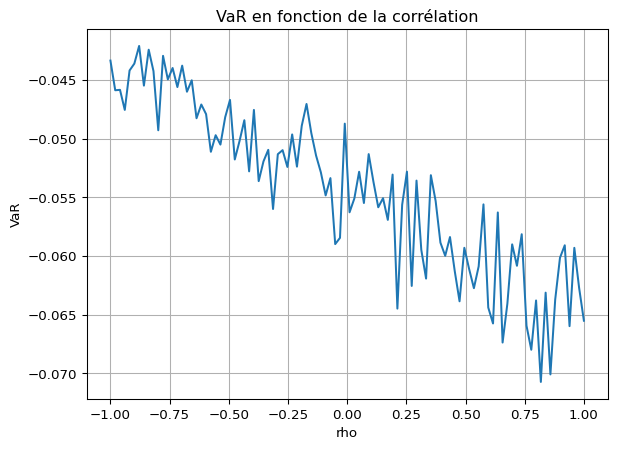

In [25]:
# VaR en fonction de rho
from tqdm import tqdm 

rhos = np.linspace(-1,1,100)
VaRs = [MC_VaR(c,T,r,lambda_,R,N,h,sigma_r, sigma_s, rho, alpha=0.99, N_MC=1000,dt=1) for rho in tqdm(rhos)]

plt.plot(rhos,VaRs)
plt.title("VaR en fonction de la corrélation")
plt.xlabel("rho")
plt.ylabel("VaR")
plt.grid()

In [26]:
cds_df = pd.read_excel("cds.xlsx", skiprows=6)
#date as date
cds_df["Date"] = pd.to_datetime(cds_df["Date"], format="%Y-%m-%d")
cds_df = cds_df.set_index("Date")
cds_df = cds_df.sort_index()

cds_df.head()

,PX_LAST
Date,
2020-03-11,30.772
2020-03-12,36.977
2020-03-13,37.869
2020-03-16,44.432
2020-03-17,49.923


In [27]:
vol_est = np.std(cds_df["PX_LAST"].pct_change())
print(f"Volatilité estimée sur 5 ans: {vol_est*np.sqrt(255):.4f}")

# volatilité sur 1 an
vol_est= np.std(cds_df.loc["2024-03-11":"2025-03-11", "PX_LAST"].pct_change())
print(f"Volatilité estimée sur 1 an : {vol_est*np.sqrt(255):.4f}")

Volatilité estimée sur 5 ans: 0.4512
Volatilité estimée sur 1 an : 0.5181
